<a href="https://colab.research.google.com/github/kiran2424/NYC-Taxi-Trip-Time-Prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NYC Taxi Trip Time Prediction/NYC Taxi Data.csv')

In [4]:
data.shape

(1458644, 11)

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [7]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [9]:
data['vendor_id'].value_counts()

2    780302
1    678342
Name: vendor_id, dtype: int64

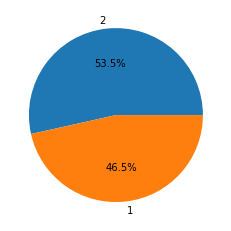

In [19]:
vendor_id = data['vendor_id'].value_counts()
plt.pie(vendor_id,labels=['2','1'],autopct='%1.1f%%')
plt.show()

In [11]:
data['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


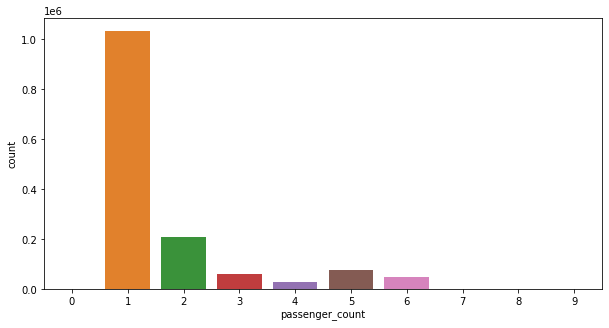

In [20]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(data['passenger_count'])
plt.show()

In [13]:
data['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

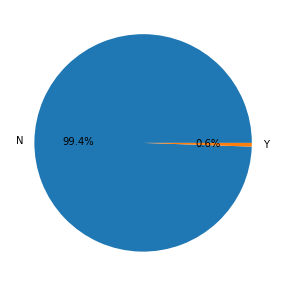

In [21]:
store_and_fwd_flag = data['store_and_fwd_flag'].value_counts()
plt.pie(store_and_fwd_flag,labels=['N','Y'],autopct='%1.1f%%')
plt.show()

As we see aboe pick up and drop off time is in object datatype. So lets convert it into datetime format.

In [36]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

In [16]:
data.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

As we can see above, both pickup_datetime and dropoff datetime is now of datetime datatype 

Now for further analysis we will need pickup days, time, month differently.
So lets seperate the datetime feature into different features.

In [37]:
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['pickup_date']=data['pickup_datetime'].dt.day
data['pickup_month']=data['pickup_datetime'].dt.month
data['pickup_hour']=data['pickup_datetime'].dt.hour
data['pickup_minutes']=data['pickup_datetime'].dt.minute

In [38]:
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['dropoff_date']=data['dropoff_datetime'].dt.day
data['dropoff_month']=data['dropoff_datetime'].dt.month
data['dropoff_hour']=data['dropoff_datetime'].dt.hour
data['dropoff_minutes']=data['dropoff_datetime'].dt.minute

In [39]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_date,pickup_month,pickup_hour,pickup_minutes,dropoff_day,dropoff_date,dropoff_month,dropoff_hour,dropoff_minutes
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,14,3,17,24,Monday,14,3,17,32
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,12,6,0,43,Sunday,12,6,0,54
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,19,1,11,35,Tuesday,19,1,12,10
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,6,4,19,32,Wednesday,6,4,19,39
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,26,3,13,30,Saturday,26,3,13,38


As we have separated all the important imformation from datetime. We can drop pickup_datetime and dropoff_datetime from our data as its of no use.

Now lets figure out the maximum pick-up and drop is in which time: Morning, Afternoon, Evening or Late Night

In [46]:
def time_of_day(x):
    if x in range(4,6):
        return 'Early Morning'
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

In [51]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)


In [52]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_date,pickup_month,pickup_hour,pickup_minutes,dropoff_day,dropoff_date,dropoff_month,dropoff_hour,dropoff_minutes,pickup_timeofday,dropoff_timeofday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,14,3,17,24,Monday,14,3,17,32,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,12,6,0,43,Sunday,12,6,0,54,Late night,Late night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,19,1,11,35,Tuesday,19,1,12,10,Morning,Afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,6,4,19,32,Wednesday,6,4,19,39,Evening,Evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,26,3,13,30,Saturday,26,3,13,38,Afternoon,Afternoon


Now lets analyse the data w.r.t month, weekday, time of day and date

In [53]:
data['pickup_timeofday'].value_counts()

Evening          489961
Morning          357477
Late night       290963
Afternoon        289449
Early Morning     30794
Name: pickup_timeofday, dtype: int64

In [55]:
data['dropoff_timeofday'].value_counts()

Evening          489912
Morning          343679
Late night       305666
Afternoon        288312
Early Morning     31075
Name: dropoff_timeofday, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


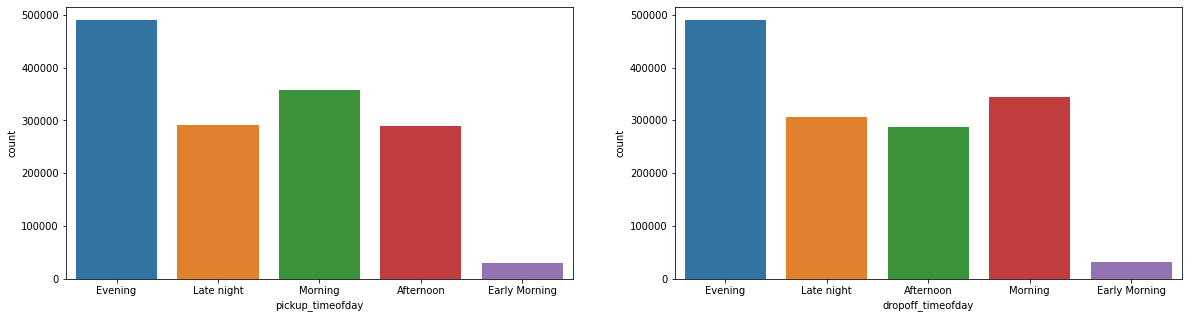

In [62]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(data['pickup_timeofday'],ax=axes[0])
sns.countplot(data['dropoff_timeofday'],ax=axes[1])
plt.show()

In [63]:
data['pickup_day'].value_counts()

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day, dtype: int64

In [64]:
data['dropoff_day'].value_counts()

Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


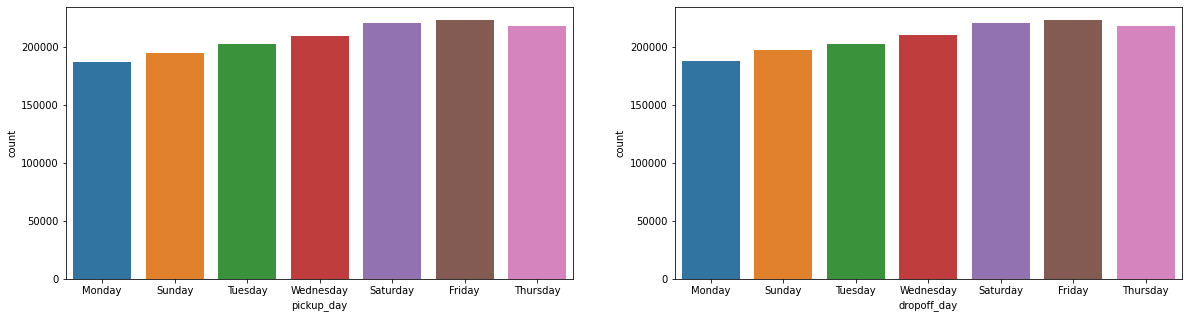

In [65]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(data['pickup_day'],ax=axes[0])
sns.countplot(data['dropoff_day'],ax=axes[1])
plt.show()

In [70]:
data['pickup_date'].value_counts()

16    51027
14    50488
5     50176
12    50080
15    49791
4     49655
9     49634
6     49476
13    49293
19    49265
20    49198
17    48968
10    48867
11    48864
7     48671
21    48306
8     48248
3     47945
18    47925
2     47752
26    47595
22    47254
27    46957
29    46807
1     46612
25    46450
28    45891
24    43876
23    41450
30    39135
31    22988
Name: pickup_date, dtype: int64

In [71]:
data['dropoff_date'].value_counts()

16    50974
14    50404
5     50183
12    50093
15    49852
9     49551
6     49533
4     49530
13    49324
19    49251
20    49186
10    49024
17    49017
11    48767
7     48710
21    48329
8     48207
3     48044
18    47918
2     47632
26    47543
22    47312
27    47033
29    46803
1     46675
25    46412
28    45908
24    43804
23    41508
30    39092
31    23025
Name: dropoff_date, dtype: int64

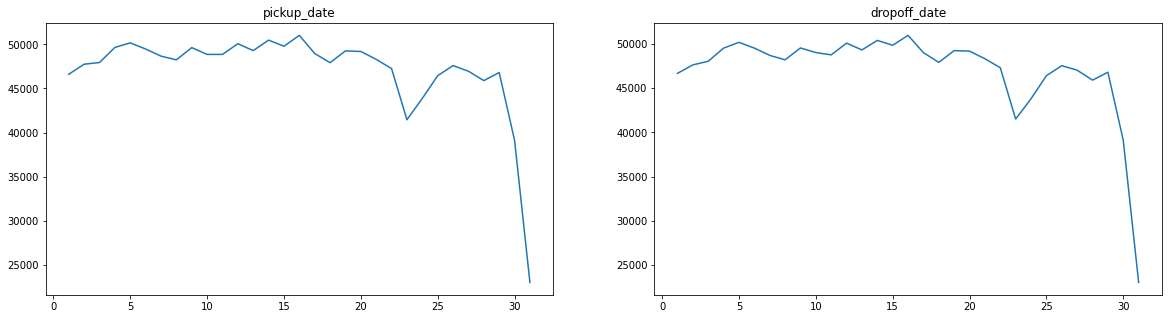

In [90]:
a=data['pickup_date'].value_counts().sort_index(ascending=True)
b=data['dropoff_date'].value_counts().sort_index(ascending=True)
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
axes[0].plot(a)
axes[0].set_title('pickup_date')
axes[1].plot(b)
axes[1].set_title('dropoff_date')
plt.show()

In [91]:
data['pickup_month'].value_counts()

3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: pickup_month, dtype: int64

In [92]:
data['dropoff_month'].value_counts()

3    256135
4    251636
5    248555
2    238292
6    234243
1    229656
7       127
Name: dropoff_month, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


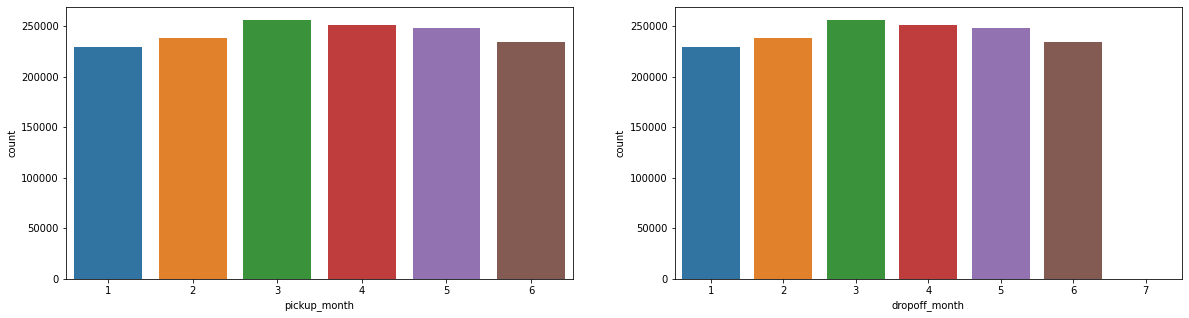

In [93]:
plt.rcParams['figure.figsize'] = (20, 5)
fig, axes = plt.subplots(1, 2)
sns.countplot(data['pickup_month'],ax=axes[0])
sns.countplot(data['dropoff_month'],ax=axes[1])
plt.show()